In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('CBETHUSD.csv')
data.head()

,DATE,CBETHUSD
0,2023-09-19,1642.82
1,2023-09-20,1622.00
2,2023-09-21,1584.04
3,2023-09-22,1593.22
4,2023-09-23,1593.86


In [6]:
data.tail()

,DATE,CBETHUSD
362,2024-09-15,2295.21
363,2024-09-16,2342.10
364,2024-09-17,2374.59
365,2024-09-18,2465.84
366,2024-09-19,2467.66


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DATE      367 non-null    object 
 1   CBETHUSD  367 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.9+ KB


C:\Users\SaiCharan Ritwik\Downloads\ANACONDA\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='CBETHUSD', ylabel='Density'>

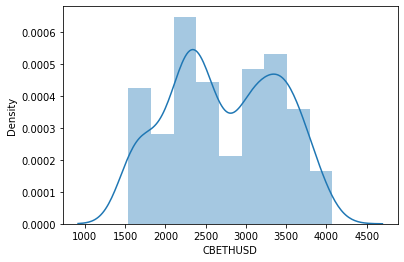

In [12]:
sns.distplot(data['CBETHUSD'])

In [13]:
data['DATE'] = pd.to_datetime(data['DATE'])
data = data.sort_values('DATE')

#### Calculating the daily returns.

In [15]:
data['Daily_Return'] = data['CBETHUSD'].pct_change()

In [16]:
data = data.dropna()

#### Statistics of daily returns.

In [17]:
mean_return = data['Daily_Return'].mean()
mean_return

0.001612135119301946

In [18]:
std_return = data['Daily_Return'].std()
std_return

0.03192088072371472

### Simulation.

In [20]:
current_price = data['CBETHUSD'].iloc[-1]
trading_days = 8
simulations = 1000

In [21]:
np.random.seed(42)
simulated_prices = np.zeros((simulations, trading_days))

In [22]:
for i in range(simulations):
    daily_returns = np.random.normal(mean_return, std_return, trading_days)
    price_path = current_price * np.exp(np.cumsum(daily_returns))
    simulated_prices[i, :] = price_path

In [23]:
final_prices = simulated_prices[:, -1]

In [24]:
mean_predicted_price = np.mean(final_prices)
median_predicted_price = np.median(final_prices)
lower_bound = np.percentile(final_prices, 5)
upper_bound = np.percentile(final_prices, 95)

mean_predicted_price, median_predicted_price, lower_bound, upper_bound

(2507.0332955658814, 2492.2908267516896, 2154.9418938211375, 2877.507093921902)